In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [3]:
# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
# MSSubClass: The building class !
# Street: Type of road access
# LandContour: Flatness of the property - ровность участка
# LandSlope: Slope of property
# Neighborhood: Physical locations within Ames city limits
# Condition1: Proximity to main road or railroad
# Condition2: Proximity to main road or railroad (if a second is present)
# BldgType: Type of dwelling
# HouseStyle: Style of dwelling
# OverallQual: Overall material and finish quality !
# OverallCond: Overall condition rating !
# YearBuilt: Original construction date !
# YearRemodAdd: Remodel date !
# RoofStyle: Type of roof
# RoofMatl: Roof material
# Foundation: Type of foundation
# Heating: Type of heating
# HeatingQC: Heating quality and condition
# CentralAir: Central air conditioning
# 1stFlrSF: First Floor square feet !
# 2ndFlrSF: Second floor square feet !
# LowQualFinSF: Low quality finished square feet (all floors) !
# GrLivArea: Above grade (ground) living area square feet !
# FullBath: Full bathrooms above grade !
# HalfBath: Half baths above grade !
# Bedroom: Number of bedrooms above basement level !
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) !
# PavedDrive: Paved driveway
# WoodDeckSF: Wood deck area in square feet !
# OpenPorchSF: Open porch area in square feet !
# EnclosedPorch: Enclosed porch area in square feet !
# 3SsnPorch: Three season porch area in square feet !
# ScreenPorch: Screen porch area in square feet !
# MiscVal: $Value of miscellaneous feature! 
# MoSold: Month Sold !
# YrSold: Year Sold !

In [4]:
print(df_train.columns)
print(f'\nDuplicates in test set: {df_train.duplicated().sum()}, ({np.round(100*df_train.duplicated().sum()/len(df_train),1)}%)\n')
for col in df_train:
    print('nulls in {}: '.format(col),df_train[col].isnull().sum())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
for col in df_train:
    missing_values = df_train[col].isnull().sum() / df_train[col].count()
    print('{} - {}%'.format(col, round(missing_values*100)))

Id - 0%
MSSubClass - 0%
MSZoning - 0%
LotFrontage - 22%
LotArea - 0%
Street - 0%
Alley - 1504%
LotShape - 0%
LandContour - 0%
Utilities - 0%
LotConfig - 0%
LandSlope - 0%
Neighborhood - 0%
Condition1 - 0%
Condition2 - 0%
BldgType - 0%
HouseStyle - 0%
OverallQual - 0%
OverallCond - 0%
YearBuilt - 0%
YearRemodAdd - 0%
RoofStyle - 0%
RoofMatl - 0%
Exterior1st - 0%
Exterior2nd - 0%
MasVnrType - 1%
MasVnrArea - 1%
ExterQual - 0%
ExterCond - 0%
Foundation - 0%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinSF1 - 0%
BsmtFinType2 - 3%
BsmtFinSF2 - 0%
BsmtUnfSF - 0%
TotalBsmtSF - 0%
Heating - 0%
HeatingQC - 0%
CentralAir - 0%
Electrical - 0%
1stFlrSF - 0%
2ndFlrSF - 0%
LowQualFinSF - 0%
GrLivArea - 0%
BsmtFullBath - 0%
BsmtHalfBath - 0%
FullBath - 0%
HalfBath - 0%
BedroomAbvGr - 0%
KitchenAbvGr - 0%
KitchenQual - 0%
TotRmsAbvGrd - 0%
Functional - 0%
Fireplaces - 0%
FireplaceQu - 90%
GarageType - 6%
GarageYrBlt - 6%
GarageFinish - 6%
GarageCars - 0%
GarageArea - 0%
Garage

In [6]:
MSZoning_mode = df_train['MSZoning'].mode()
MSZoning_mode.dtype                            #КАК ДОСТАТЬ ЗНАЧЕНИЕ?
print(MSZoning_mode)
df_train['MSZoning'].fillna(value='RL', inplace=True)
# df_test.loc[df_test['MSZoning'].isna()== True].index

0    RL
Name: MSZoning, dtype: object


In [7]:
# PoolArea: Pool area in square feet
# PoolQC: Pool quality

# PoolQC: Pool quality

#    Ex   Excellent
#    Gd   Good
#    TA   Average/Typical
#    Fa   Fair
#    NA   No Pool

# only a small proportion of houses have a pool
df_train['PoolQC'].fillna(value = 'None', inplace=True)
df_train['PoolQC'] = df_train['PoolQC'].replace({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
pool_index = df_train.loc[(df_train['PoolArea'] != 0) & (df_train['PoolQC'] == 'None')].index

<Axes: xlabel='MiscFeature', ylabel='SalePrice'>

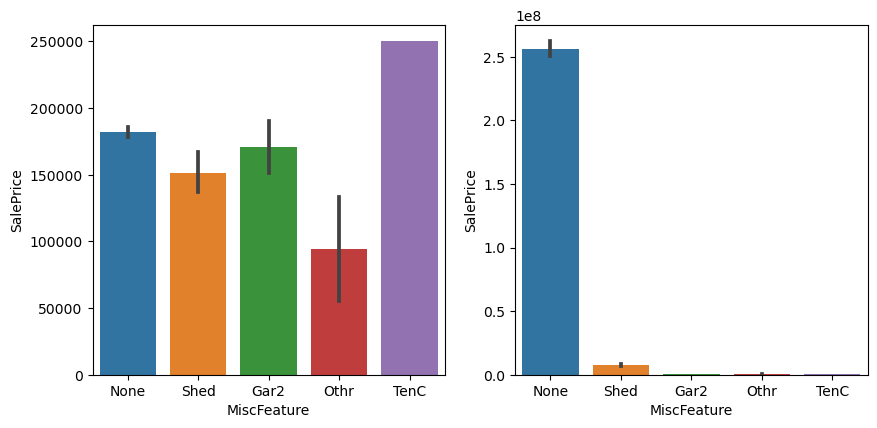

In [8]:
# MiscFeature: Miscellaneous feature not covered in other categories

#    Elev Elevator
#    Gar2 2nd Garage (if not described in garage section)
#    Othr Other
#    Shed Shed (over 100 SF)
#    TenC Tennis Court
#    NA   None
df_train['MiscFeature'].fillna(value = 'None', inplace=True)
fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.barplot(data=df_train, x=df_train['MiscFeature'], y=df_train['SalePrice'])
plt.subplot(2,2,2)
sns.barplot(data=df_train, x=df_train['MiscFeature'], y=df_train['SalePrice'], estimator='sum')

<Axes: xlabel='Alley', ylabel='SalePrice'>

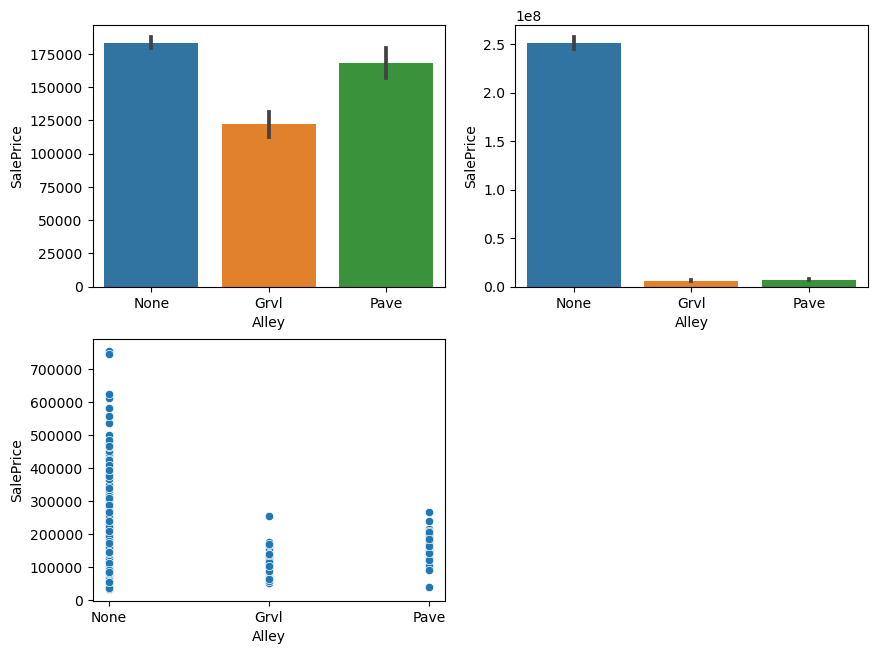

In [9]:
# Alley: Type of alley access

# В NаN могли попасть потерянные значения из других колонок этой фичи!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#    Grvl Gravel
#    Pave Paved
#    NA   No alley access
df_train['Alley'].fillna(value = 'None', inplace=True)
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 1)
plt.subplot(3,2,1)
sns.barplot(data=df_train, x=df_train['Alley'], y=df_train['SalePrice'])
plt.subplot(3,2,2)
sns.barplot(data=df_train, x=df_train['Alley'], y=df_train['SalePrice'], estimator='sum')
df_train.groupby('Alley')['Id'].nunique()
plt.subplot(3,2,3)
sns.scatterplot(data=df_train, x=df_train['Alley'], y=df_train['SalePrice'])

<Axes: xlabel='Fence', ylabel='SalePrice'>

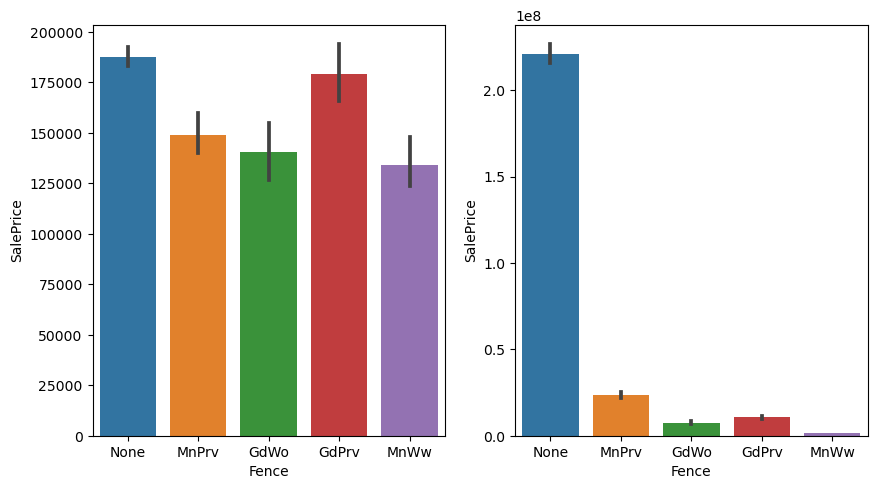

In [10]:
# Fence: Fence quality

#     GdPrv    Good Privacy
#     MnPrv    Minimum Privacy
#     GdWo     Good Wood
#     MnWw     Minimum Wood/Wire
#     NA       No Fence

df_train['Fence'].fillna(value = 'None', inplace=True)
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 2)
plt.subplot(4,2,1)
sns.barplot(data=df_train, x=df_train['Fence'], y=df_train['SalePrice'])
plt.subplot(4,2,2)
sns.barplot(data=df_train, x=df_train['Fence'], y=df_train['SalePrice'], estimator='sum')
# plt.subplot(4,2,3)
# sns.scatterplot(data=df_train, x=df_train['Fence'], y=df_train['SalePrice'])
# plt.subplot(4,2,4)
# sns.boxplot(data=df_train, x=df_train['Fence'], y=df_train['SalePrice'])

Number of NaN to be filled in: Int64Index([], dtype='int64')


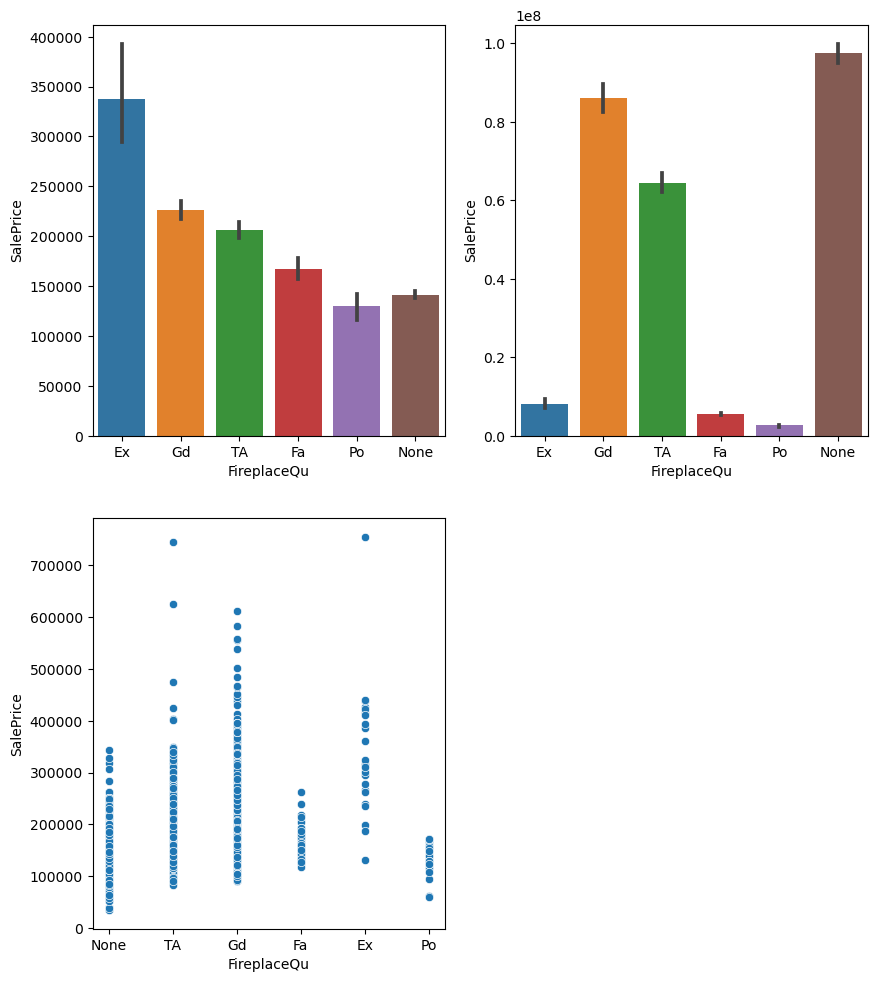

In [11]:
# Fireplaces: Number of fireplaces
# FireplaceQu: Fireplace quality

#    Ex   Excellent - Exceptional Masonry Fireplace
#    Gd   Good - Masonry Fireplace in main level
#    TA   Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#    Fa   Fair - Prefabricated Fireplace in basement
#    Po   Poor - Ben Franklin Stove
#    NA   No Fireplace

df_train['FireplaceQu'].fillna(value = 'None', inplace=True)
fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(top = 2)
plt.subplot(4,2,1)
sns.barplot(data=df_train, x=df_train['FireplaceQu'], y=df_train['SalePrice'], order=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'])
plt.subplot(4,2,2)
sns.barplot(data=df_train, x=df_train['FireplaceQu'], y=df_train['SalePrice'], estimator='sum',\
            order=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'])
df_train.groupby('FireplaceQu')['Id'].nunique()
plt.subplot(4,2,3)
sns.scatterplot(data=df_train, x=df_train['FireplaceQu'], y=df_train['SalePrice'])
# plt.subplot(4,2,4)
# sns.boxplot(data=df_train, x=df_train['Fence'], y=df_train['SalePrice'])
print('Number of NaN to be filled in: {}'.format(df_train.loc[(df_train['Fireplaces'] != 0) & (df_train['FireplaceQu'] == 'None')].index))

<Axes: xlabel='Condition1', ylabel='LotFrontage'>

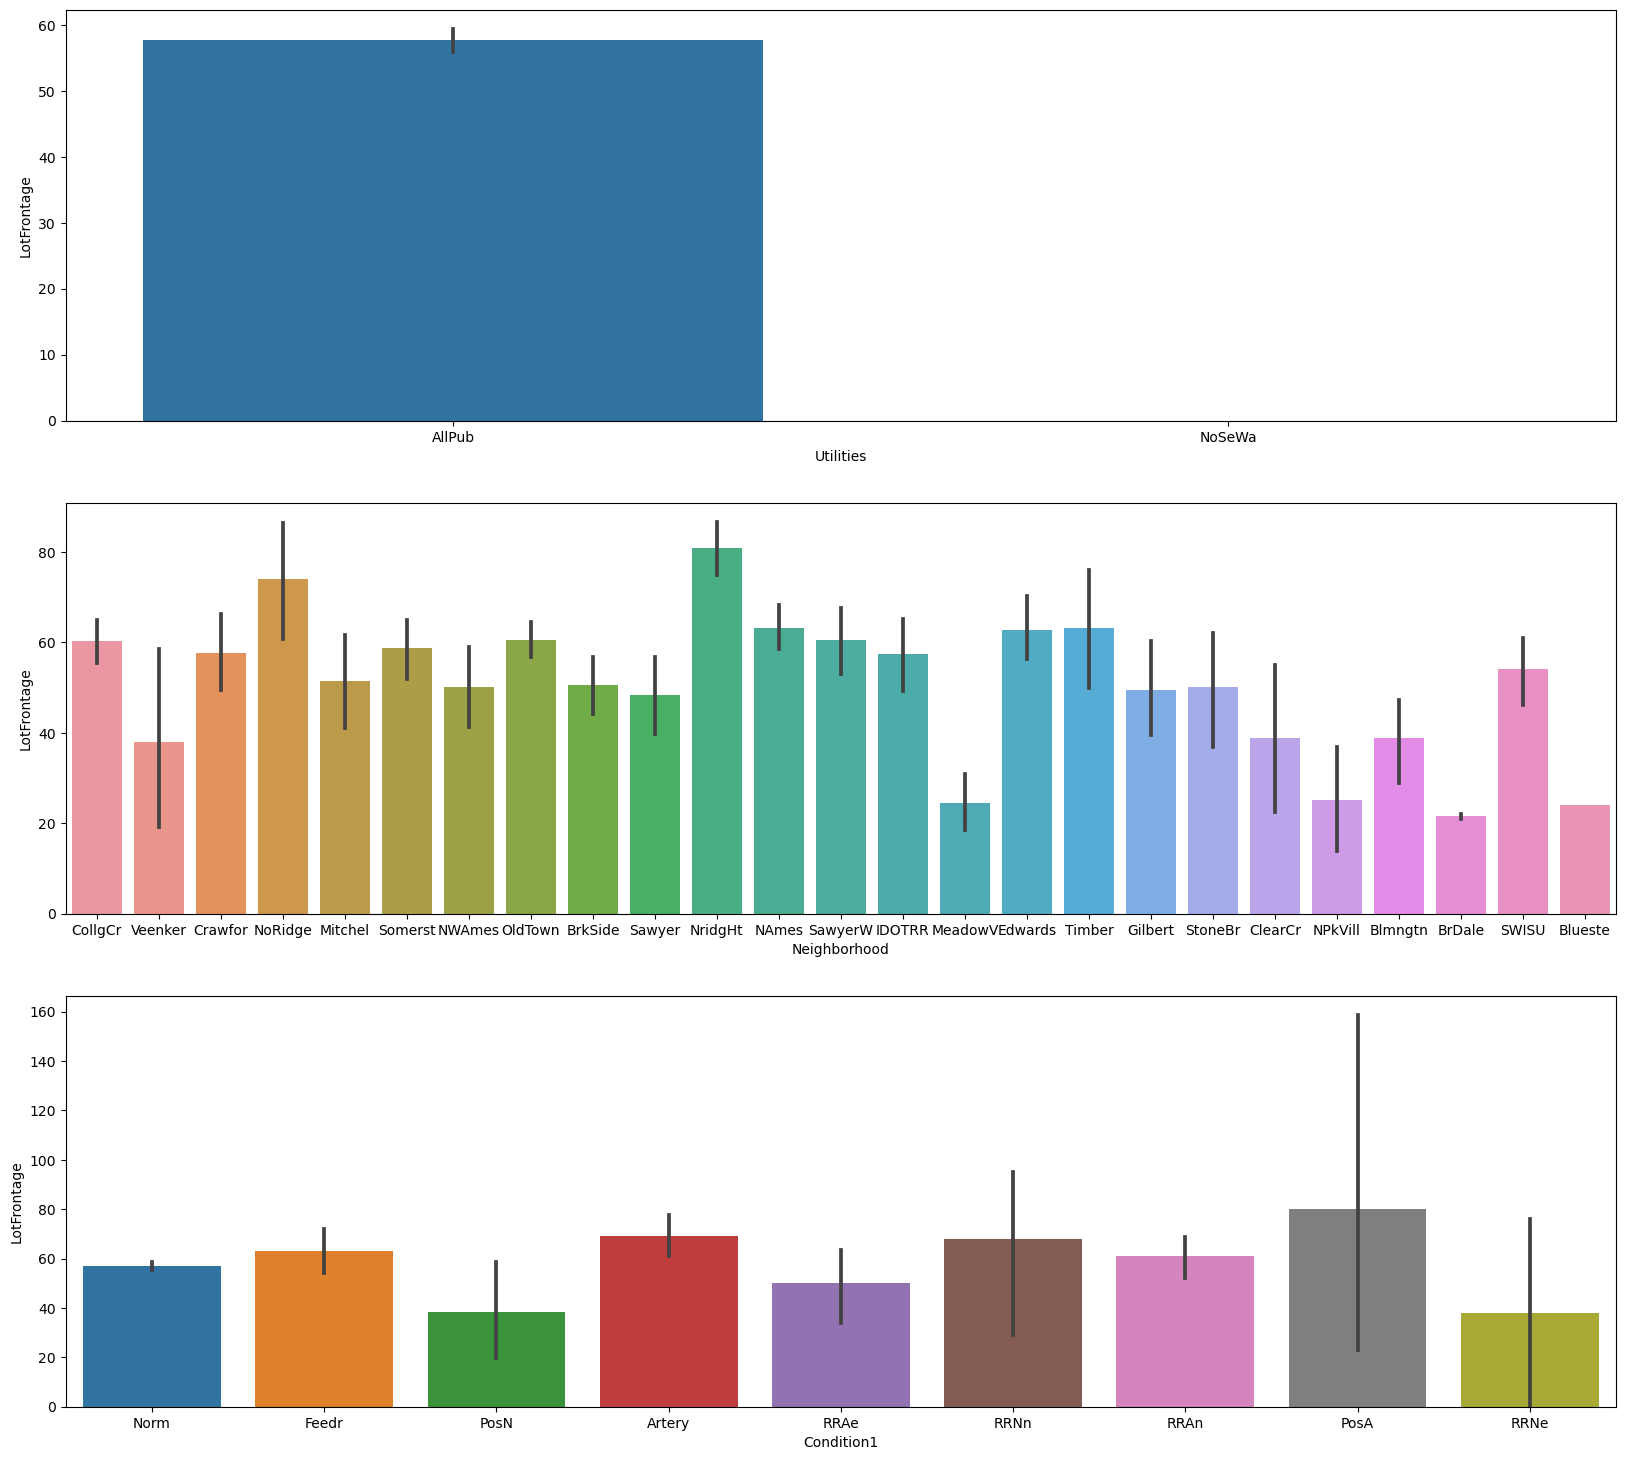

In [12]:
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# LotShape: General shape of property
# LotConfig: Lot configuration

df_train['LotFrontage'].fillna(value = 0, inplace=True)
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(top = 2)
plt.subplot(4,1,1)
sns.barplot(data=df_train, y=df_train['LotFrontage'], x=df_train['Utilities'])
plt.subplot(4,1,2)
sns.barplot(data=df_train, y=df_train['LotFrontage'], x=df_train['Neighborhood'])
plt.subplot(4,1,3)
sns.barplot(data=df_train, y=df_train['LotFrontage'], x=df_train['Condition1'])

In [13]:
for i in LotFrontage_zero_index:
    df_train['LotFrontage'].iloc[i] = df_train.loc[(df_train['Neighborhood'] == df_train['Neighborhood'].iloc[i]),\
                                                   'LotFrontage'].median()

Int64Index([   7,   12,   14,   16,   24,   31,   42,   43,   50,   64,
            ...
            1407, 1417, 1419, 1423, 1424, 1429, 1431, 1441, 1443, 1446],
           dtype='int64', length=259)


C:\Users\New\AppData\Local\Temp\ipykernel_39352\2590122491.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['LotFrontage'].iloc[i] = df_train.loc[(df_train['Neighborhood'] == df_train['Neighborhood'].iloc[i]),\


<Axes: xlabel='LotConfig', ylabel='SalePrice'>

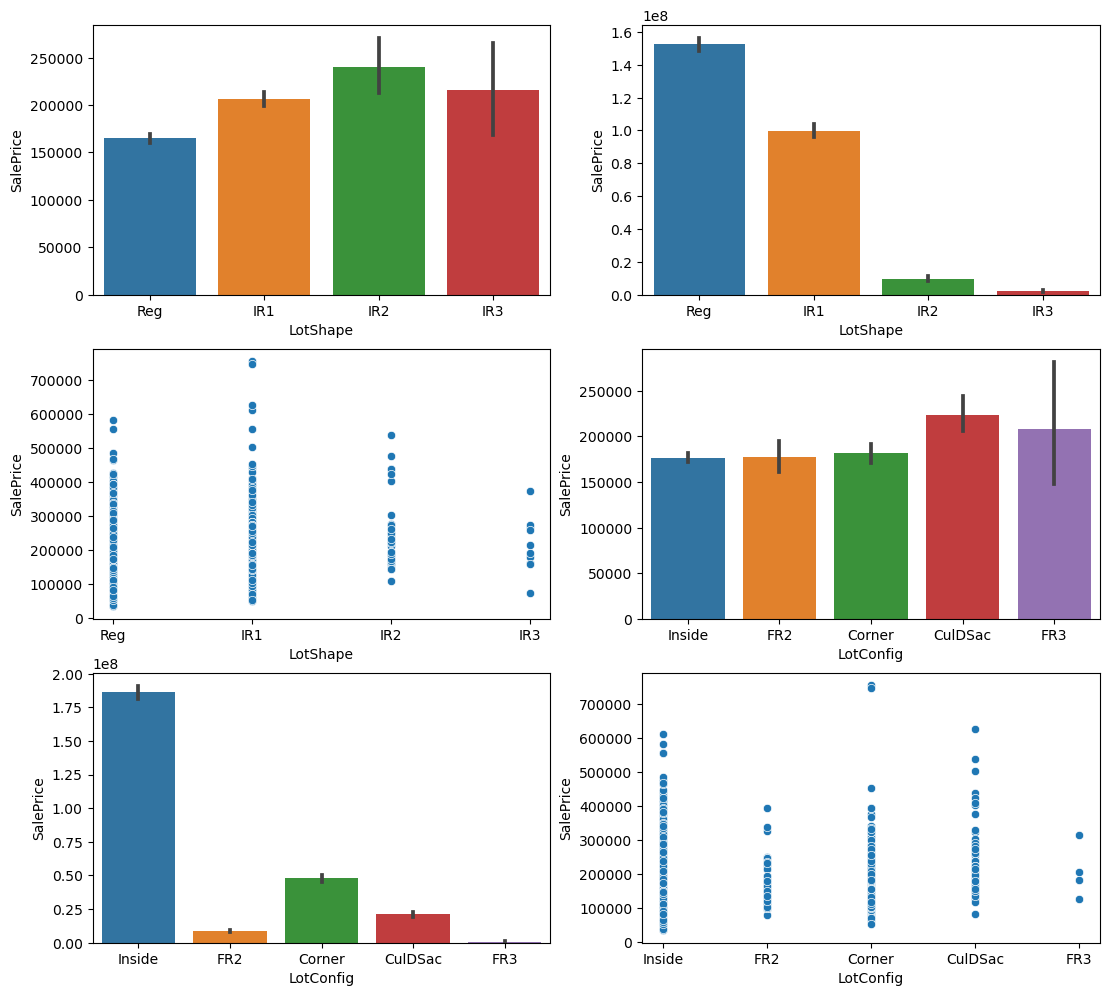

In [14]:
fig = plt.figure(figsize=(13,10))
plt.subplots_adjust(top = 2)
plt.subplot(6,2,1)
sns.barplot(data=df_train, x=df_train['LotShape'], y=df_train['SalePrice'])
plt.subplot(6,2,2)
sns.barplot(data=df_train, x=df_train['LotShape'], y=df_train['SalePrice'], estimator='sum')
plt.subplot(6,2,3)
sns.scatterplot(data=df_train, x=df_train['LotShape'], y=df_train['SalePrice'])
plt.subplot(6,2,4)
sns.barplot(data=df_train, x=df_train['LotConfig'], y=df_train['SalePrice'])
plt.subplot(6,2,5)
sns.barplot(data=df_train, x=df_train['LotConfig'], y=df_train['SalePrice'], estimator='sum')
plt.subplot(6,2,6)
sns.scatterplot(data=df_train, x=df_train['LotConfig'], y=df_train['SalePrice'])

In [15]:
# GarageType: Garage location
# GarageYrBlt: Year garage was built
# GarageFinish: Interior finish of the garage
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# GarageQual: Garage quality
# GarageCond: Garage condition

# GarageType      :
#    2Types   More than one type of garage
#    Attchd   Attached to home
#    Basment  Basement Garage
#    BuiltIn  Built-In (Garage part of house - typically has room above garage)
#    CarPort  Car Port
#    Detchd   Detached from home
#    NA   No Garage

df_train['GarageType'].fillna(value = 'No Garage', inplace=True) 

df_train.loc[df_train['GarageType'] == 'No Garage', 'GarageArea'] = 0
df_train.loc[df_train['GarageType'] == 'No Garage', 'GarageYrBlt'] = 0
df_train.loc[df_train['GarageType'] == 'No Garage', 'GarageFinish'] = 'None'
df_train.loc[df_train['GarageType'] == 'No Garage', 'GarageCars'] = 0
df_train.loc[df_train['GarageType'] == 'No Garage', 'GarageQual'] = 'None'
df_train.loc[df_train['GarageType'] == 'No Garage', 'GarageCond'] = 'None'

#Замечена сильная корреляция между GarageYrBlt и YearBuilt, заполним часть nan

nan_index=df_train.loc[(df_train['GarageType'] != 'No Garage') & (df_train['YearBuilt'].notna()) & \
                       (df_train['GarageYrBlt'].isna()), 'YearBuilt'].index
df_train.loc[nan_index,'GarageYrBlt']=df_train.iloc[nan_index]['YearBuilt']

In [16]:
# BsmtQual: Height of the basement
# BsmtCond: General condition of the basement
# BsmtExposure: Walkout or garden level basement walls
# BsmtFinType1: Quality of basement finished area
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinType2: Quality of second finished area (if present)
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms



In [17]:
df_train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',\
         'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']].isna().sum()
# BsmtQual:
#    Ex   Excellent (100+ inches) 
#    Gd   Good (90-99 inches)
#    TA   Typical (80-89 inches)
#    Fa   Fair (70-79 inches)
#    Po   Poor (<70 inches
#    NA   No Basement
df_train['BsmtQual'].fillna(value = 'No Basement', inplace=True) 

df_train.loc[df_train['BsmtQual'] == 'No Basement', 'BsmtCond'] = 'None'
df_train.loc[df_train['BsmtQual'] == 'No Basement', 'BsmtExposure'] = 'None'
df_train.loc[df_train['BsmtQual'] == 'No Basement', 'BsmtFinType1'] = 'None'
df_train.loc[df_train['BsmtQual'] == 'No Basement', 'BsmtFinSF1'] = 0
df_train.loc[df_train['BsmtQual'] == 'No Basement', 'BsmtFinType2'] = 'None'
df_train.loc[df_train['BsmtQual'] == 'No Basement', 'BsmtFinSF2'] = 0
df_train.loc[df_train['BsmtQual'] == 'No Basement', 'BsmtUnfSF'] = 0
df_train.loc[df_train['BsmtQual'] == 'No Basement', 'TotalBsmtSF'] = 0
df_train.loc[df_train['BsmtQual'] == 'No Basement', 'BsmtFullBath'] = 0
df_train.loc[df_train['BsmtQual'] == 'No Basement', 'BsmtHalfBath'] = 0

df_train['BsmtExposure'].fillna(value = 'No', inplace=True) 
df_train['BsmtFinType2'].fillna(value = 'LwQ', inplace=True)
df_train['BsmtUnfSF'].astype(int)
df_train['TotalBsmtSF'].astype(int)
df_train['BsmtUnfSF'].fillna(value = 0, inplace=True) 
df_train['TotalBsmtSF'].fillna(value = 0, inplace=True)

In [18]:
# MasVnrType: Masonry veneer type
# MasVnrArea: Masonry veneer area in square feet

df_train['MasVnrType'].fillna(value = 'None', inplace=True)
df_train['MasVnrArea'].fillna(value = 0, inplace=True) 

In [19]:
# MSZoning: The general zoning classification Зонирование - разделение на участки
#    A    Agriculture
#    C    Commercial
#    FV   Floating Village Residential
#    I    Industrial
#    RH   Residential High Density
#    RL   Residential Low Density
#    RP   Residential Low Density Park 
#    RM   Residential Medium Density
df_train[['MSZoning']].isna().sum()

MSZoning    0
dtype: int64

In [20]:
# KitchenAbvGr: Number of kitchens
# KitchenQual: Kitchen quality

# KitchenQual:
#    Ex   Excellent
#    Gd   Good
#    TA   Typical/Average
#    Fa   Fair
#    Po   Poor
df_train[['KitchenQual', 'KitchenAbvGr']].isna().sum()

KitchenQual     0
KitchenAbvGr    0
dtype: int64

In [21]:
# Utilities: Type of utilities available - доступные типы уоммунальных услуг
#    AllPub   All public Utilities (E,G,W,& S)    
#    NoSewr   Electricity, Gas, and Water (Septic Tank)
#    NoSeWa   Electricity and Gas Only
#    ELO  Electricity only
df_train[['Utilities']].isna().sum()

# Почти все переменные AllPub, поэтому этот критерий бесполезный для нас
df_train[['Utilities']].loc[df_train['Utilities'] == 'AllPub'].count() / df_train[['Utilities']].count() 
df_train = df_train.drop(['Utilities'], axis=1)

In [22]:
# Functional: Home functionality rating
#    Typ  Typical Functionality
#    Min1 Minor Deductions 1
#    Min2 Minor Deductions 2
#    Mod  Moderate Deductions
#    Maj1 Major Deductions 1
#    Maj2 Major Deductions 2
#    Sev  Severely Damaged
#    Sal  Salvage only
df_train[['Functional']].isna().sum()

Functional    0
dtype: int64

In [23]:
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)
# ExterQual: Exterior material quality
# ExterCond: Present condition of the material on the exterior

# Exterior1st: 
df_train[['Exterior1st','Exterior2nd', 'ExterQual', 'ExterCond']].isna().sum()

Exterior1st    0
Exterior2nd    0
ExterQual      0
ExterCond      0
dtype: int64

In [24]:
# Electrical: Electrical system
df_train['Electrical'].fillna(value = 'SBrkr', inplace=True)
df_train[['Electrical']].isna().sum()

Electrical    0
dtype: int64

In [25]:
# SaleType: Type of sale
# SaleCondition: Condition of sale
df_train[['SaleType', 'SaleCondition']].isna().sum()

SaleType         0
SaleCondition    0
dtype: int64

In [26]:
label = LabelEncoder()
df_train['MiscFeature'] = label.fit_transform(df_train['MiscFeature'])
df_train['Alley'] = label.fit_transform(df_train['Alley'])
df_train['Fence'] = label.fit_transform(df_train['Fence'])
df_train['LotConfig'] = label.fit_transform(df_train['LotConfig'])
df_train['GarageType'] = label.fit_transform(df_train['GarageType'])
df_train['MSZoning'] = label.fit_transform(df_train['MSZoning'])
df_train['Functional'] = label.fit_transform(df_train['Functional'])
df_train['Exterior1st'] = label.fit_transform(df_train['Exterior1st'])
df_train['Exterior2nd'] = label.fit_transform(df_train['Exterior2nd'])
df_train['Electrical'] = label.fit_transform(df_train['Electrical'])
df_train['SaleType'] = label.fit_transform(df_train['SaleType'])
df_train['SaleCondition'] = label.fit_transform(df_train['SaleCondition'])
df_train['Foundation'] = label.fit_transform(df_train['Foundation'])
df_train['Heating'] = label.fit_transform(df_train['Heating'])
df_train['RoofStyle'] = label.fit_transform(df_train['RoofStyle'])
df_train['RoofMatl'] = label.fit_transform(df_train['RoofMatl'])
df_train['LandContour'] = label.fit_transform(df_train['LandContour'])
df_train['BldgType'] = label.fit_transform(df_train['BldgType'])
df_train['HouseStyle'] = label.fit_transform(df_train['HouseStyle'])
df_train['Neighborhood'] = label.fit_transform(df_train['Neighborhood'])
df_train['Condition1'] = label.fit_transform(df_train['Condition1'])
df_train['Condition2'] = label.fit_transform(df_train['Condition2'])

df_train['FireplaceQu'] = df_train['FireplaceQu'].replace({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_train['LotShape'] = df_train['LotShape'].replace({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})
df_train['GarageFinish'] = df_train['GarageFinish'].replace({'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
df_train['GarageQual'] = df_train['GarageQual'].replace({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_train['GarageCond'] = df_train['GarageCond'].replace({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_train['BsmtQual'] = df_train['BsmtQual'].replace({'No Basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_train['BsmtCond'] = df_train['BsmtCond'].replace({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_train['BsmtExposure'] = df_train['BsmtExposure'].replace({'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].replace({'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].replace({'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
# Cуществует существенная разница между “common brick/none” и другими типами
# Gростые каменные и деревянные дома дешевле
df_train['MasVnrType'] = df_train['MasVnrType'].replace({'None': 0, 'BrkCmn': 0, 'BrkFace': 1, 'Stone': 2})
df_train['KitchenQual'] = df_train['KitchenQual'].replace({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_train['ExterQual'] = df_train['ExterQual'].replace({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_train['ExterCond'] = df_train['ExterCond'].replace({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_train['HeatingQC'] = df_train['HeatingQC'].replace({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
df_train['CentralAir'] = df_train['CentralAir'].replace({'N': 0, 'Y': 1})
df_train['LandSlope'] = df_train['LandSlope'].replace({'Sev': 0, 'Mod': 1, 'Gtl': 2})
df_train['Street'] = df_train['Street'].replace({'Grvl': 0, 'Pave': 1})
df_train['PavedDrive'] = df_train['PavedDrive'].replace({'N': 0, 'P': 1, 'Y': 2})

<Axes: xlabel='MoSold', ylabel='SalePrice'>

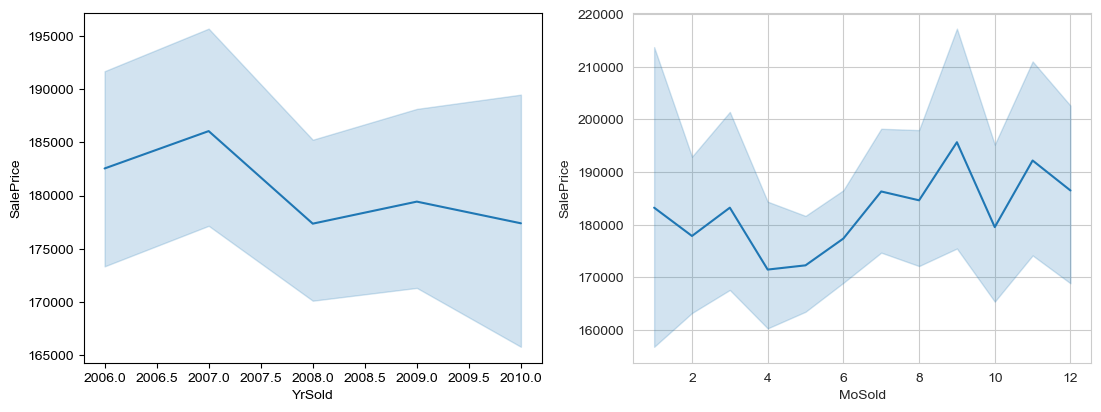

In [27]:
fig = plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.set_style("whitegrid")
sns.lineplot(data=df_train, x='YrSold', y = 'SalePrice')
plt.subplot(2,2,2)
sns.lineplot(data=df_train, x='MoSold', y = 'SalePrice')

<Axes: >

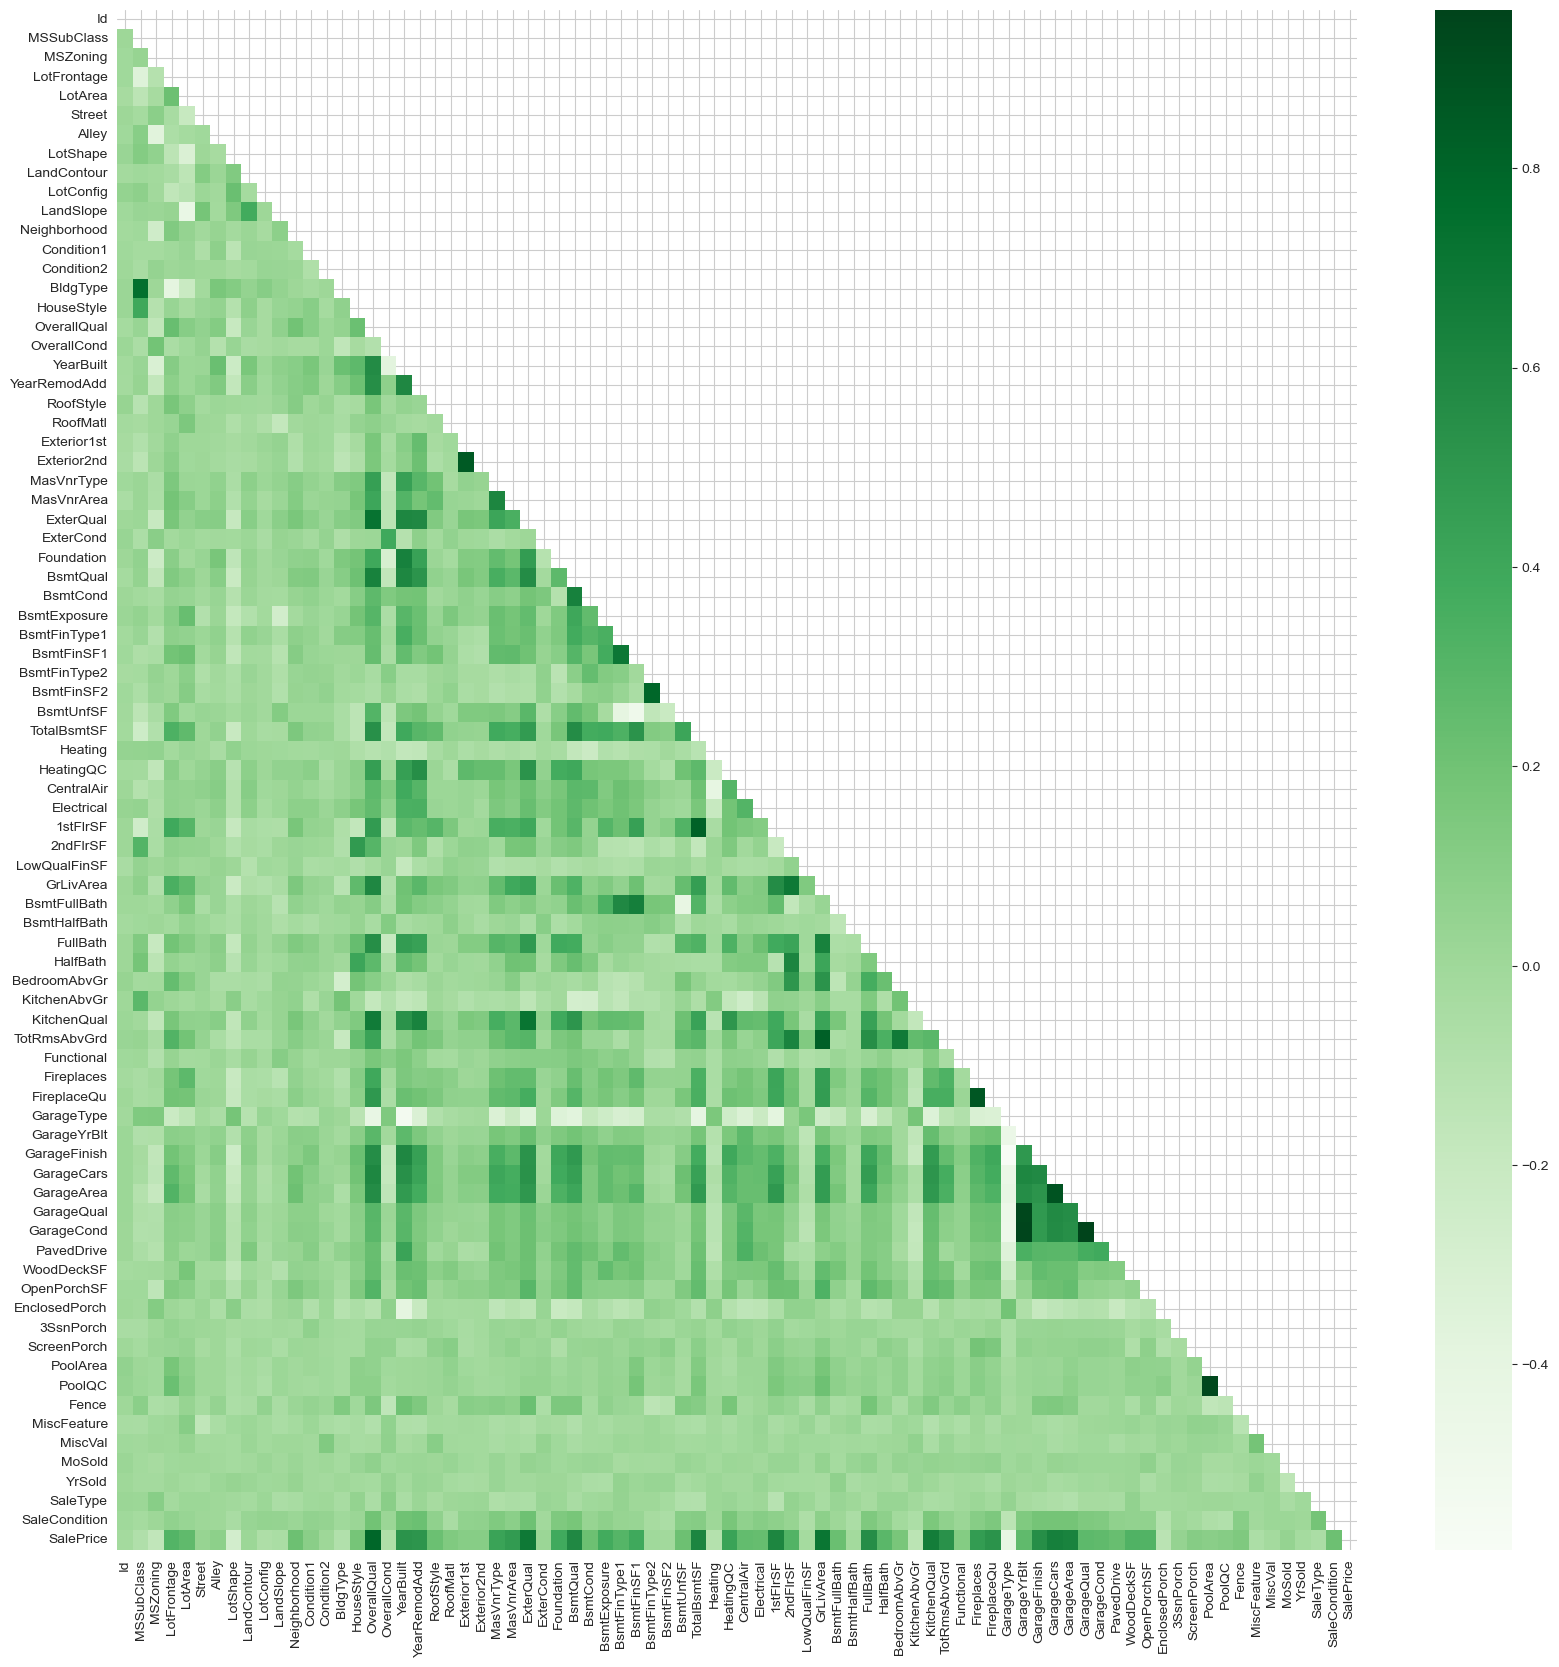

In [28]:
fig = plt.figure(figsize=(20,20))
matrix = np.triu(df_train.corr())
sns.heatmap(data = df_train.corr(), cmap='Greens', fmt='.1g', mask=matrix) # annot = True,

In [29]:
# GrLivArea это сумма 1stFlrSF + 2ndFlrSF + LowQualFinSF
df_train['FlrSum'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['LowQualFinSF']
df_train[['GrLivArea', 'FlrSum']].corr()

,GrLivArea,FlrSum
GrLivArea,1.0,1.0
FlrSum,1.0,1.0


In [30]:
# По отдельности переменные, обозначающие количество ванных комнат имеют слабую корреляцию с SalePrice (кроме FullBath)
df_train[['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'SalePrice']].corr()

,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,SalePrice
FullBath,1.000000,0.136381,-0.064512,-0.054536,0.560664
HalfBath,0.136381,1.000000,-0.030905,-0.012340,0.284108
BsmtFullBath,-0.064512,-0.030905,1.000000,-0.147871,0.227122
BsmtHalfBath,-0.054536,-0.012340,-0.147871,1.000000,-0.016844
SalePrice,0.560664,0.284108,0.227122,-0.016844,1.000000


<Axes: xlabel='BsmtHalfBath', ylabel='SalePrice'>

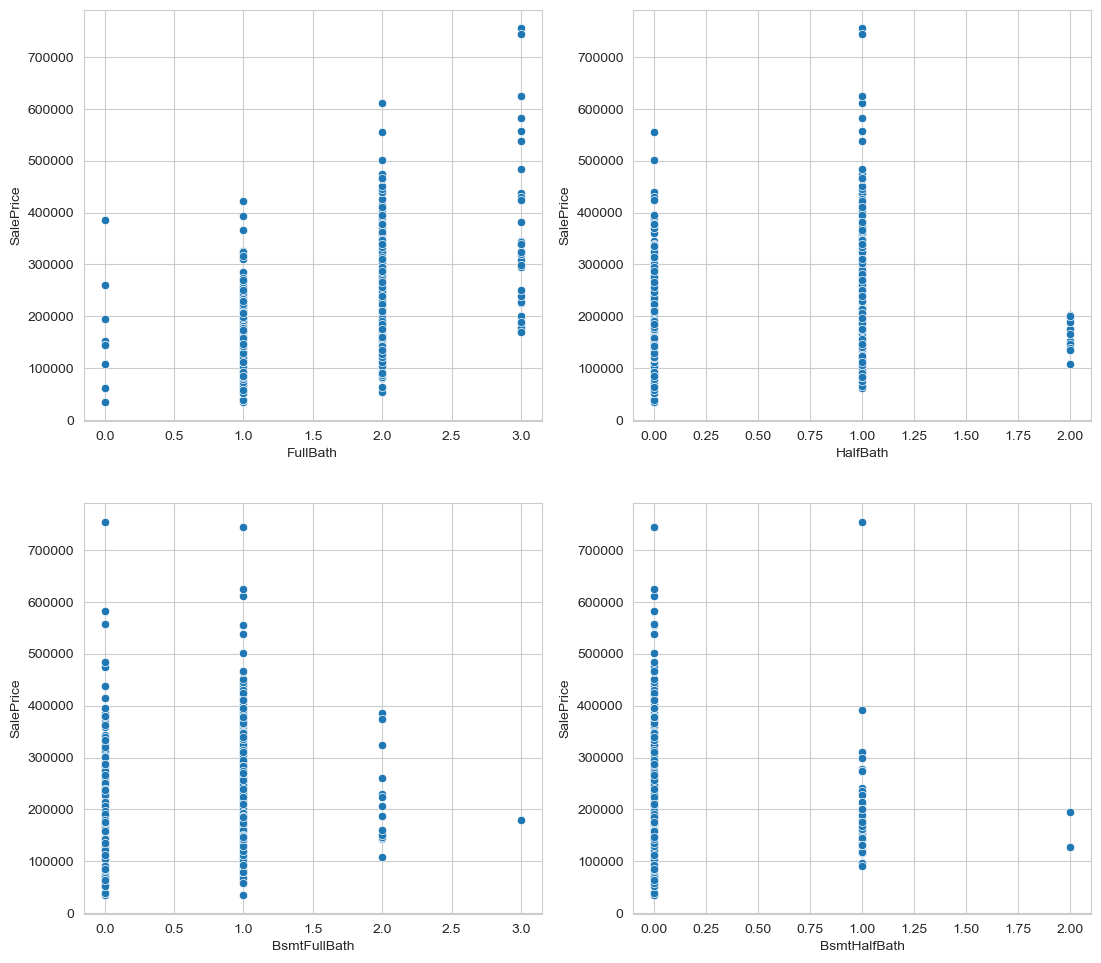

In [31]:
plt.figure(figsize=(13,10))
plt.subplots_adjust(top = 2)
plt.subplot(4,2,1)
sns.scatterplot(data=df_train, x='FullBath', y='SalePrice')
plt.subplot(4,2,2)
sns.scatterplot(data=df_train, x='HalfBath', y='SalePrice')
plt.subplot(4,2,3)
sns.scatterplot(data=df_train, x='BsmtFullBath', y='SalePrice')
plt.subplot(4,2,4)
sns.scatterplot(data=df_train, x='BsmtHalfBath', y='SalePrice')

,SalePrice,TotalBath
SalePrice,1.000000,0.631731
TotalBath,0.631731,1.000000


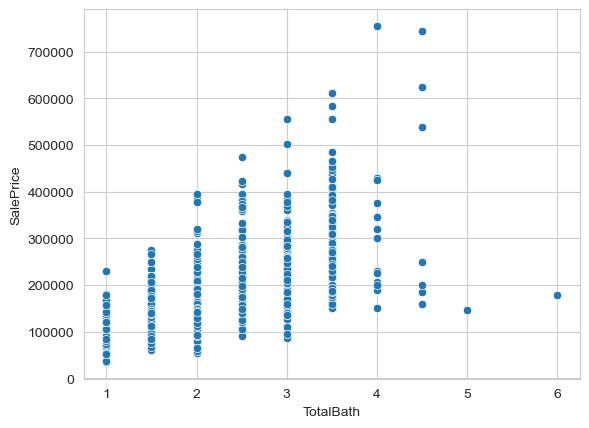

In [32]:
# Объединив их мы получаем переменную с более сильной корреляцией
df_train['TotalBath'] = df_train['FullBath'] + df_train['HalfBath']*0.5 + df_train['BsmtFullBath'] + df_train['BsmtHalfBath']*0.5
sns.scatterplot(data=df_train, x = df_train['TotalBath'], y = df_train['SalePrice'])
df_train[['SalePrice', 'TotalBath']].corr()

<Axes: >

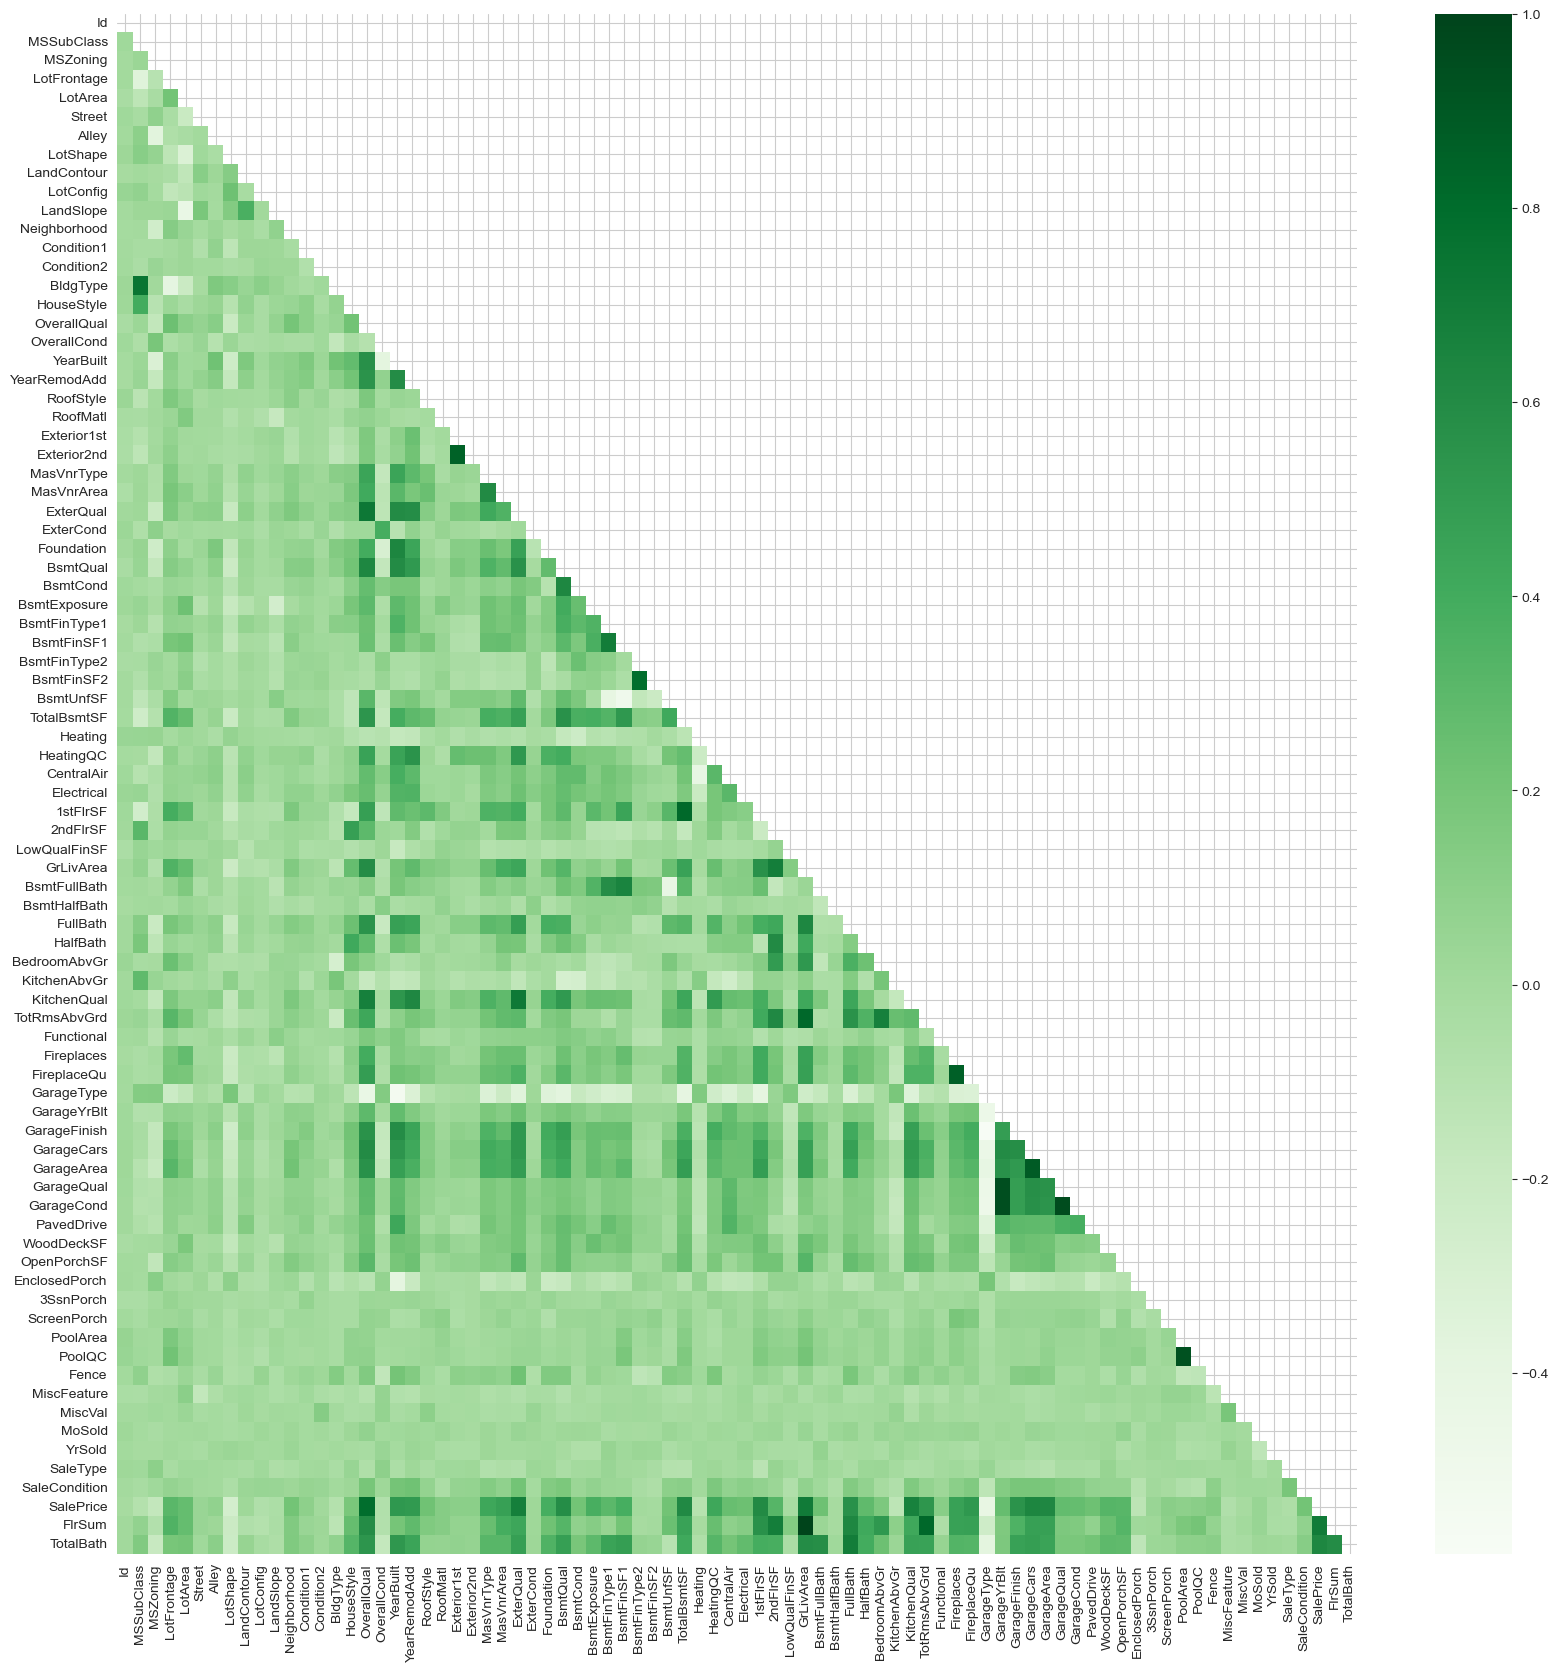

In [33]:
fig = plt.figure(figsize=(20,20))
matrix = np.triu(df_train.corr())
sns.heatmap(data = df_train.corr(), cmap='Greens', fmt='.1g', mask=matrix) # annot = True,


In [34]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckS

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [36]:
X = df_train.drop('SalePrice', axis=1)
y = df_train[['SalePrice']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                    test_size=0.2, random_state=42)

In [38]:
model = RandomForestRegressor(random_state=42)
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
criterion = ['squared_error', 'absolute_error']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)] 
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 102, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 102, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(model, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train.values.ravel())
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 6,
 'criterion': 'absolute_error',
 'bootstrap': True}

In [39]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

In [40]:
rs_df.mean_test_score.max()

0.8322236612712385

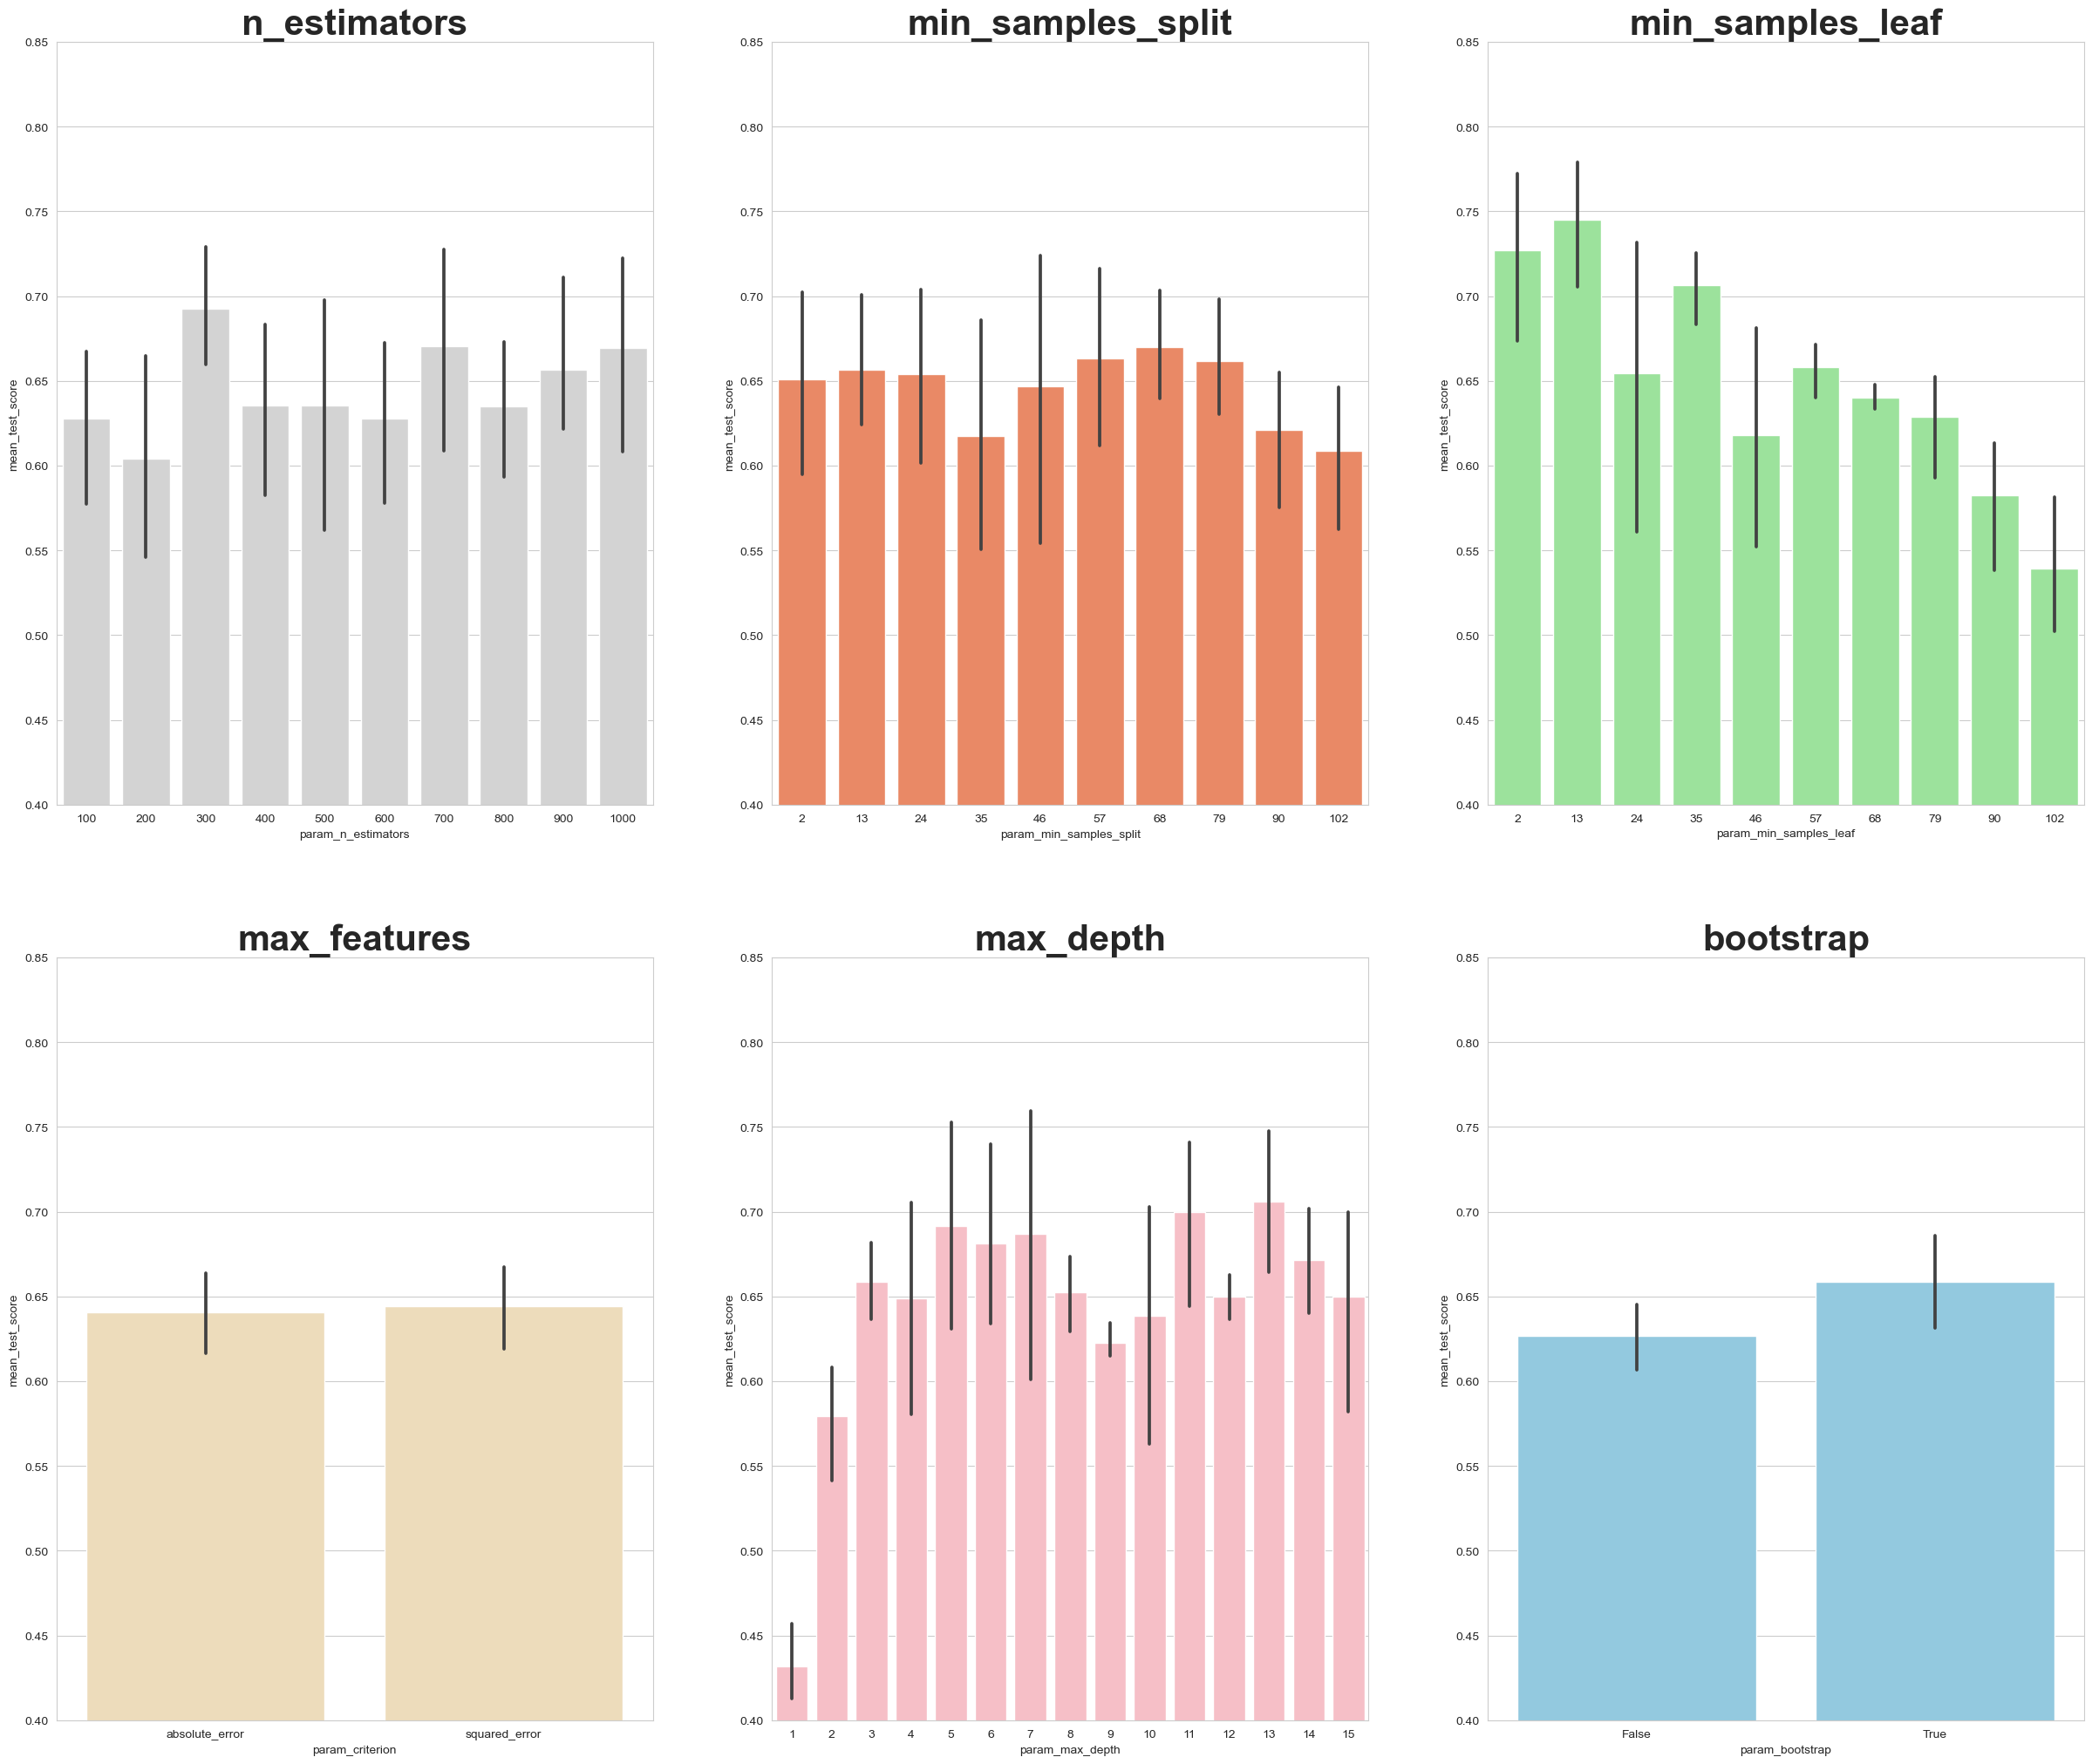

In [41]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.40,.85])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.40,.85])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.40,.85])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_criterion', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.40,.85])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.40,.85])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.40,.85])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [43]:
eval_set = [(X_test, y_test)]
model_xgboost = xgboost.XGBRegressor(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=5000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      verbosity=1)

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=True)

[0]	validation_0-rmse:81494.95530
[1]	validation_0-rmse:76692.25043
[2]	validation_0-rmse:71491.34436
[3]	validation_0-rmse:67337.15926
[4]	validation_0-rmse:63061.98767
[5]	validation_0-rmse:59505.45055
[6]	validation_0-rmse:56286.39309
[7]	validation_0-rmse:53313.92537
[8]	validation_0-rmse:50574.19762
[9]	validation_0-rmse:48379.36291
[10]	validation_0-rmse:46088.50205
[11]	validation_0-rmse:43787.20046
[12]	validation_0-rmse:41959.52238
[13]	validation_0-rmse:40347.89268
[14]	validation_0-rmse:39159.19569
[15]	validation_0-rmse:38204.15193
[16]	validation_0-rmse:37150.31747
[17]	validation_0-rmse:35879.07231
[18]	validation_0-rmse:35006.20289
[19]	validation_0-rmse:34106.27928
[20]	validation_0-rmse:33336.59085
[21]	validation_0-rmse:32797.26776
[22]	validation_0-rmse:32089.12375
[23]	validation_0-rmse:31497.38050
[24]	validation_0-rmse:31397.88472
[25]	validation_0-rmse:31183.25629
[26]	validation_0-rmse:30923.16107
[27]	validation_0-rmse:30415.51636
[28]	validation_0-rmse:29995.5

E:\Anaconda\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
y_train_pred = model_xgboost.predict(X_train)[:]
y_valid_pred = model_xgboost.predict(X_test)[:]

model_xgboost.score(X_train, y_train)

0.9783009860420471

In [45]:
cv_score = cross_val_score(model_xgboost, X_train, y_train, cv = 10)
cv_score.mean()

0.8604828201728433

In [46]:
y_pred = model_xgboost.predict(X_test)
r2_score = r2_score(y_test, y_pred)
print(r2_score)

0.90865006480862


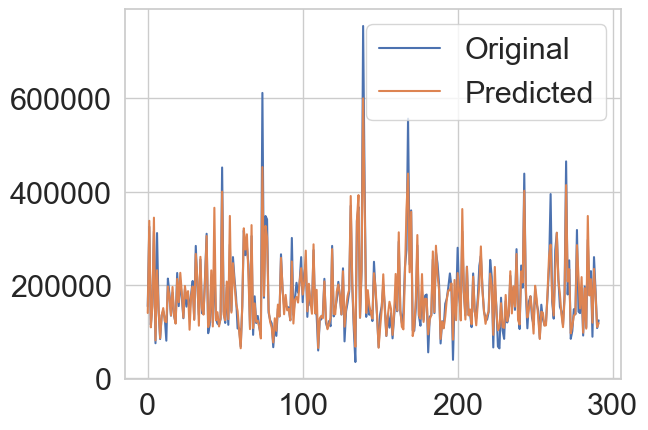

In [47]:
x_ax = range(len(y_pred))
plt.plot(x_ax, y_test, label = 'Original')
plt.plot(x_ax, y_pred, label = 'Predicted')
plt.legend()